In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ref: https://www.nature.com/articles/nature10098#Fig2

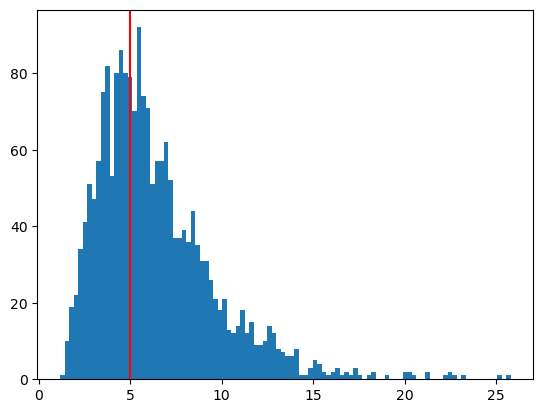

In [4]:
np.random.seed(0)

n = 2000

# Splicing rate
beta_mu = 2
beta_sd = 0.5

beta = np.random.lognormal(beta_mu, beta_sd, size=n)
plt.hist(60*np.log(2)/beta, bins=100);
plt.axvline(x=5, color='r');

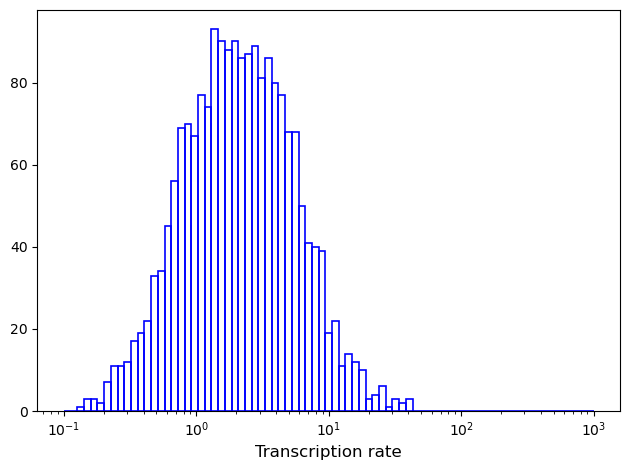

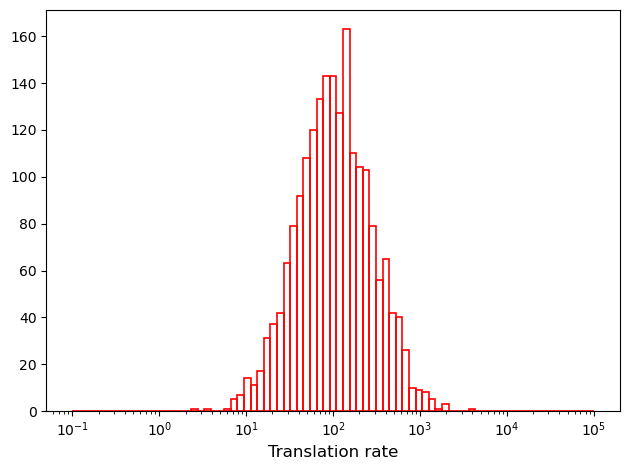

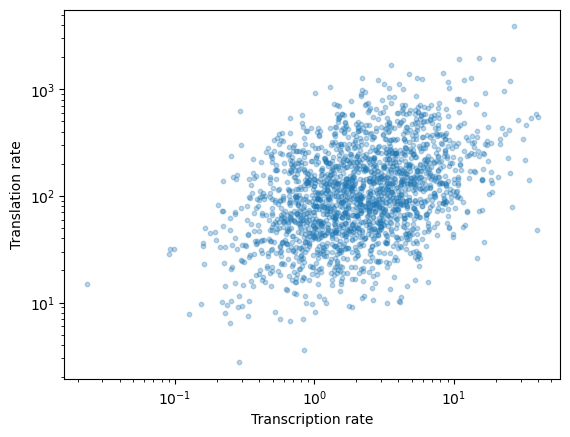

In [6]:
np.random.seed(0)

# Transcription rate
alpha_mu = np.log(2) # 2
alpha_sd = 1

# Translation rate
transl_rate_mu = np.log(100)
transl_rate_sd = 1

# Generate transcription rates and translation rates that are correlated

rho = .4
cov = [[alpha_sd**2, rho * alpha_sd * transl_rate_sd],
       [rho * alpha_sd * transl_rate_sd, transl_rate_sd**2]]
log_vals = np.random.multivariate_normal(mean=[alpha_mu, transl_rate_mu], cov=cov, size=n)

# Exponentiate to get correlated log-normal variables
alpha = np.exp(log_vals[:, 0])
transl_rate = np.exp(log_vals[:, 1])

# Plot

# Transcription rates
log_bins = np.logspace(-1, 3, 80)
plt.hist(alpha, bins=log_bins, edgecolor='blue', facecolor='none', linewidth=1.2)
plt.xscale('log')
plt.xlabel('Transcription rate', fontsize=12)
plt.tight_layout()
plt.show()

# Translation rates
log_bins = np.logspace(-1, 5, 80)
plt.hist(transl_rate, bins=log_bins, edgecolor='red', facecolor='none', linewidth=1.2)
plt.xscale('log')
plt.xlabel('Translation rate', fontsize=12)
plt.tight_layout()
plt.show()

# Plot alpha vs. beta
plt.scatter(alpha, transl_rate, alpha=0.3, s=10);
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Transcription rate')
plt.ylabel('Translation rate')
plt.show()

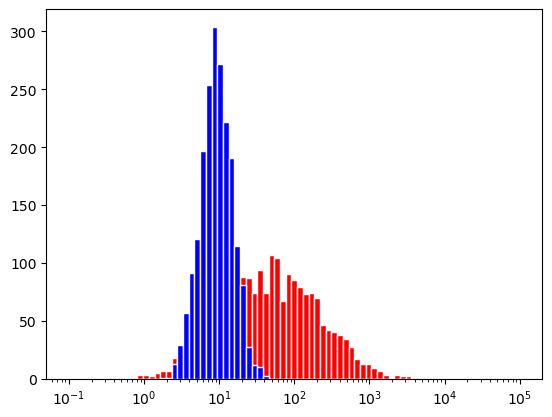

In [7]:
np.random.seed(0)

# mRNA degradation rate
rna_median_half_life = 9
gamma_rate = np.log(2) / rna_median_half_life
gamma_mu = np.log(gamma_rate) # Median of lognormal
gamma_sd = 0.5
gamma = np.random.lognormal(gamma_mu, gamma_sd, size=n)
rna_half_lives = np.log(2) / gamma

# Protein degradation rate
protein_median_half_life = 46
deg_rate = np.log(2) / protein_median_half_life
deg_rate_mu = np.log(deg_rate) # Median of lognormal
deg_rate_sd = 1.5
deg_rate = np.random.lognormal(deg_rate_mu, deg_rate_sd, size=n)
protein_half_lives = np.log(2) / deg_rate

log_bins = np.logspace(-1, 5, 80)
plt.hist(protein_half_lives, bins=log_bins, color='red', edgecolor='white')
plt.hist(rna_half_lives, bins=log_bins, color='blue', edgecolor='white')
# plt.axvline(target_half_life_median, color='black', label='Target median ≈ 50 h')
plt.xscale('log')